In [4]:
# 📊 Análise de Vendas - Projeto de Aula

# 1. Importação de bibliotecas e leitura da base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("sales_data_sample.csv", encoding='latin1')


In [6]:
# 2. Listas, tuplas e dicionários
# Lista de países únicos
countries = list(df['COUNTRY'].unique())

# Tupla com trimestres
quarters = tuple(sorted(df['QTR_ID'].unique()))

# Dicionário - total de vendas por pais
sales_by_country = {country: df[df['COUNTRY'] == country]['SALES'].sum() for country in countries}
print("Vendas por país:", sales_by_country)



Vendas por país: {'USA': np.float64(3627982.83), 'France': np.float64(1110916.52), 'Norway': np.float64(307463.7), 'Australia': np.float64(630623.1), 'Finland': np.float64(329581.91000000003), 'Austria': np.float64(202062.53), 'UK': np.float64(478880.45999999996), 'Spain': np.float64(1215686.92), 'Sweden': np.float64(210014.21), 'Singapore': np.float64(288488.41000000003), 'Canada': np.float64(224078.56000000003), 'Japan': np.float64(188167.80999999997), 'Italy': np.float64(374674.31), 'Denmark': np.float64(245637.15), 'Belgium': np.float64(108412.62000000001), 'Philippines': np.float64(94015.73000000001), 'Germany': np.float64(220472.09000000003), 'Switzerland': np.float64(117713.55999999998), 'Ireland': np.float64(57756.43)}


In [7]:
# 3. Estruturas condicionais
# Classificação com if/elif/else
def classificar_pedido(valor):
    if valor > 8100:
        return "Grande"
    elif valor > 3500:
        return "Médio"
    else:
        return "Pequeno"

df['CATEGORIA_PEDIDO'] = df['SALES'].apply(classificar_pedido)
print(df[['SALES', 'CATEGORIA_PEDIDO']].head())


     SALES CATEGORIA_PEDIDO
0  2871.00          Pequeno
1  2765.90          Pequeno
2  3884.34            Médio
3  3746.70            Médio
4  5205.27            Médio


In [8]:
# 4. Loops for e while
# Loop for para somar vendas por DEALSIZE
deal_sizes = df['DEALSIZE'].unique()
total_por_deal = {}
for size in deal_sizes:
    total_por_deal[size] = df[df['DEALSIZE'] == size]['SALES'].sum()
print("Vendas por DealSize:", total_por_deal)

# Loop while - exemplo didático
i = 0
linhas_processadas = 0
while i < 10:
    linhas_processadas += 1
    i += 1
print("Linhas processadas com while:", linhas_processadas)



Vendas por DealSize: {'Small': np.float64(2643077.35), 'Medium': np.float64(6087432.24), 'Large': np.float64(1302119.2600000002)}
Linhas processadas com while: 10


In [9]:
# 5. Manipulação de colunas com pandas
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df['VALOR_UNITARIO'] = df['SALES'] / df['QUANTITYORDERED']
print(df[['ORDERDATE', 'VALOR_UNITARIO']].head())



   ORDERDATE  VALOR_UNITARIO
0 2003-02-24           95.70
1 2003-05-07           81.35
2 2003-07-01           94.74
3 2003-08-25           83.26
4 2003-10-10          106.23


In [10]:
# 6. Operações com NumPy
df['ALTO_VALOR'] = np.where(df['SALES'] > 5000, True, False)
print(df[['SALES', 'ALTO_VALOR']].head())



     SALES  ALTO_VALOR
0  2871.00       False
1  2765.90       False
2  3884.34       False
3  3746.70       False
4  5205.27        True


In [11]:
# 7. Filtragens, agrupamentos e resumos com pandas
vendas_por_ano = df.groupby('YEAR_ID')['SALES'].sum()
vendas_por_mes = df.groupby('MONTH_ID')['SALES'].sum()
top_10_produtos = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False).head(10)

print("Vendas por ano:\n", vendas_por_ano)
print("Vendas por mês:\n", vendas_por_mes)
print("Top 10 linhas de produto:\n", top_10_produtos)


Vendas por ano:
 YEAR_ID
2003    3516979.54
2004    4724162.60
2005    1791486.71
Name: SALES, dtype: float64
Vendas por mês:
 MONTH_ID
1      785874.44
2      810441.90
3      754501.39
4      669390.96
5      923972.56
6      454756.78
7      514875.97
8      659310.57
9      584724.27
10    1121215.22
11    2118885.67
12     634679.12
Name: SALES, dtype: float64
Top 10 linhas de produto:
 PRODUCTLINE
Classic Cars        3919615.66
Vintage Cars        1903150.84
Motorcycles         1166388.34
Trucks and Buses    1127789.84
Planes               975003.57
Ships                714437.13
Trains               226243.47
Name: SALES, dtype: float64


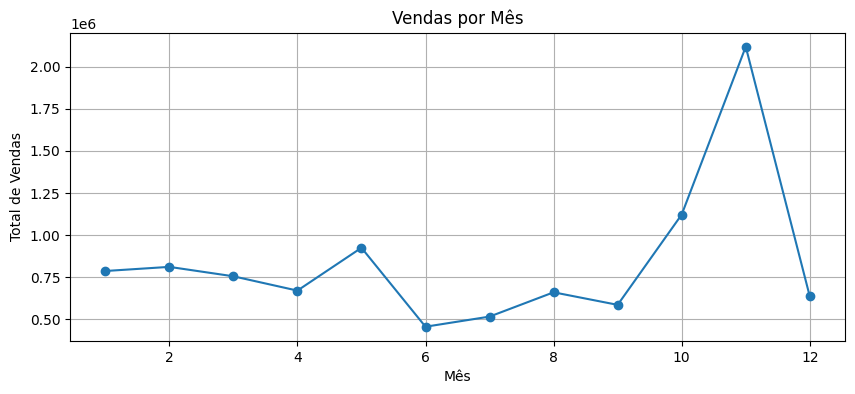

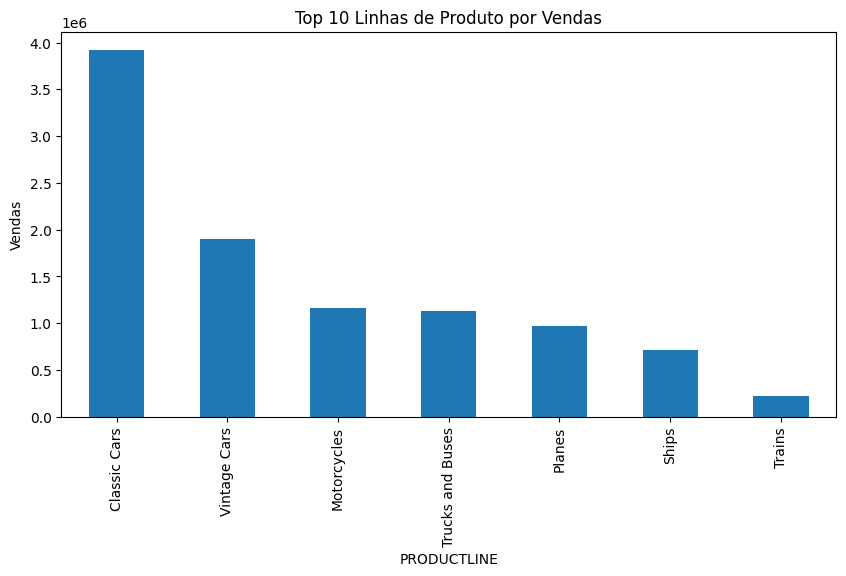

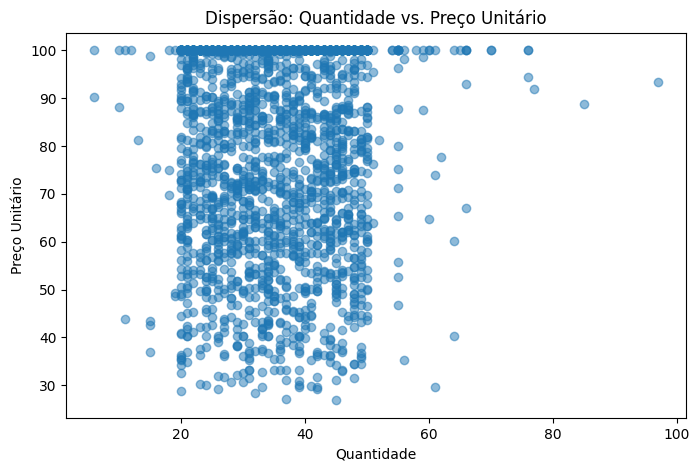

In [13]:
 #8. Gráficos com matplotlib

# Gráfico de linha - Vendas por Mês
plt.figure(figsize=(10, 4))
plt.plot(vendas_por_mes.index, vendas_por_mes.values, marker='o')
plt.title('Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.grid(True)
plt.show()

# Gráfico de barras - Top 10 produtos
plt.figure(figsize=(10, 5))
top_10_produtos.plot(kind='bar')
plt.title('Top 10 Linhas de Produto por Vendas')
plt.ylabel('Vendas')
plt.show()

# Gráfico de dispersão - Quantidade vs. Preço
plt.figure(figsize=(8, 5))
plt.scatter(df['QUANTITYORDERED'], df['PRICEEACH'], alpha=0.5)
plt.title('Dispersão: Quantidade vs. Preço Unitário')
plt.xlabel('Quantidade')
plt.ylabel('Preço Unitário')
plt.show()



In [19]:
# 9. Relatório Final (Markdown)
from IPython.display import Markdown as md
md("""
## 📝 Relatório Final - Descobertas e Aprendizados

- A maioria dos pedidos está na categoria **Média** ou **Pequena**, com menos ocorrências de pedidos grandes.
- A linha de produtos com maior volume de vendas foi **{}**, podendo ser explicado pela população de maior pedidos, os EUA.
- A maior concentração de vendas ocorreu no mês **{}**, é necessário mais dados para entender se a Black Friday está influenciando as vendas.
- O uso de pandas facilitou operações como agrupamentos e filtragens.
- Com numpy`, consegui categorizar rapidamente os pedidos de alto valor.
- Gráficos de linha, barra e dispersão ajudaram a visualizar padrões e tendências.
""".format(top_10_produtos.index[0], vendas_por_mes.idxmax()))


## 📝 Relatório Final - Descobertas e Aprendizados

- A maioria dos pedidos está na categoria **Média** ou **Pequena**, com menos ocorrências de pedidos grandes.
- A linha de produtos com maior volume de vendas foi **Classic Cars**, podendo ser explicado pela população de maior pedidos, os EUA.
- A maior concentração de vendas ocorreu no mês **11**, é necessário mais dados para entender se a Black Friday está influenciando as vendas.
- O uso de pandas facilitou operações como agrupamentos e filtragens.
- Com numpy`, consegui categorizar rapidamente os pedidos de alto valor.
- Gráficos de linha, barra e dispersão ajudaram a visualizar padrões e tendências.
